# Abalone

bla bla bla do this later

In [84]:
import pandas as pd

df = pd.read_csv('abalone.csv')
df.describe()

,length,diameter,height,whole_height,shucked_height,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [85]:
df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_height      0
shucked_height    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [86]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_height', 'shucked_height',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

In [87]:
df = df.drop('sex', axis=1)
df.columns

Index(['length', 'diameter', 'height', 'whole_height', 'shucked_height',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

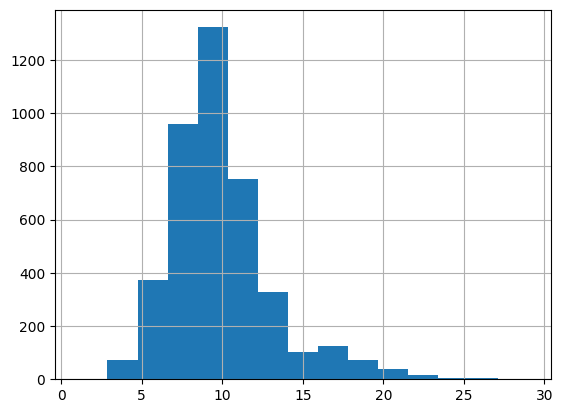

In [88]:
import matplotlib.pyplot as plt

df['rings'].hist(bins=15)
plt.show()

In [89]:
corr_matrix = df.corr()
corr_matrix['rings'].sort_values(ascending=False)

rings             1.000000
shell_weight      0.627574
diameter          0.574660
height            0.557467
length            0.556720
whole_height      0.540390
viscera_weight    0.503819
shucked_height    0.420884
Name: rings, dtype: float64

In [90]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from math import sqrt
from random import randint
import json

knn_model = KNeighborsRegressor(n_neighbors=3)
random_state = randint(100000, 200000)
X_train, X_test, y_train, y_test = train_test_split(df.drop('rings', axis=1), df['rings'], test_size=0.2, random_state=random_state)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
rmse = sqrt(mse)

print(f'Root Mean Squared Error for random state of {random_state}: {rmse}')

Root Mean Squared Error for random state of 154181: 1.6458744960545377


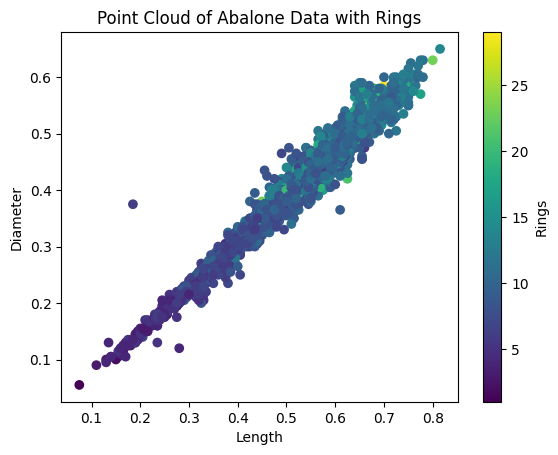

In [83]:
plt.scatter(df['length'], df['diameter'], c=df['rings'], cmap='viridis')
plt.colorbar(label='Rings')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('Point Cloud of Abalone Data with Rings')
plt.show()